<a href="https://colab.research.google.com/github/kubohenrique/airbnb_LA/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Los Angeles*

<center><img alt="Analisando Airbnb" width="60%" src="https://images.unsplash.com/photo-1580655653885-65763b2597d0?q=80&w=3270&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"></center>

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="20%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Los Angeles, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Los Angeles (good for visualisations).*

Importante: O portal está em constante evolução, e em determinado momento, pode ser que o [conjunto de dados](https://data.insideairbnb.com/united-states/ca/los-angeles/2023-12-03/visualisations/listings.csv) exato utilizado nesse notebook não esteja mais disponível, o que quebraria nosso código.

Pensando nisso, disponibilizamos [aqui](https://github.com/kubohenrique/airbnb_LA/raw/main/Data/listings.csv) o conjunto que utilizamos, para que você sempre consiga utilizar esse material.

Com isso em mente, vamos ao projeto.


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import matplotlib.pyplot as plt

from IPython.display import display

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('https://github.com/kubohenrique/airbnb_LA/raw/main/Data/listings.csv')

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.




**Dicionário das variáveis**

* `id` - Identificador único do Airbnb para o anúncio.
* `name` - Nome do anúncio.
* `host_id` - Identificador único do anfitrião/usuário da Airbnb.
* `host_name` - Nome do anfitrião. Normalmente apenas o primeiro nome(s).
* `neighbourhood_group` - O grupo do bairro geocodificado usando a latitude e longitude em relação aos bairros definidos por shapefiles digitais abertos ou públicos.
* `neighbourhood` - O bairro geocodificado usando a latitude e longitude em relação aos bairros definidos por shapefiles digitais abertos ou públicos.
* `latitude` - Utiliza o sistema geodésico mundial (WGS84) para projeção de latitude e longitude.
* `longitude` - Uses the World Geodetic System (WGS84) projection for latitude and longitude.
* `room_type` - Tipo de Acomodação: Toda a casa/apartamento, Quarto privado,Quarto compartilhado ou Hotel.
* `price` - Preço diário na moeda local. Observação: o símbolo $ pode ser usado, independentemente da localidade.
* `minimum_nights` - Número mínimo de noites para a estadia no anúncio (as regras do calendário podem ser diferentes).
* `number_of_reviews` - O número de avaliações que o anúncio possui.
* `last_review` - A data da última/nova avaliação.
* `reviews_per_month` - Quantidade de Reviews por mês.
* `calculated_host_listings_count` - O número de anúncios que o anfitrião possui na coleta atual, na geografia da cidade/região.
* `availability_365` - Disponibilidade_x. A disponibilidade do anúncio x dias no futuro, conforme determinado pelo calendário. Observação: um anúncio pode estar disponível porque foi reservado por um hóspede ou bloqueado pelo anfitrião.
* `number_of_reviews_ltm` - O número de avaliações que o anúncio recebeu (nos últimos 12 meses).
* `license`

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.


In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,109,Condo in Culver City · 2 bedrooms · 2 beds · 2...,521,Paolo,Other Cities,Culver City,33.98301,-118.38607,Entire home/apt,129,30,2,2016-05-15,0.01,1,180,0,NaN
1,2708,Rental unit in Los Angeles · ★4.85 · 1 bedroom...,3008,Chas.,City of Los Angeles,Hollywood,34.09625,-118.34605,Private room,94,30,40,2023-07-31,0.35,2,271,2,NaN
2,2732,Rental unit in Santa Monica · ★4.41 · 1 bedroo...,3041,Yoga Priestess,Other Cities,Santa Monica,34.00440,-118.48095,Private room,179,7,24,2022-08-21,0.16,2,360,0,228269
3,63416,Home in Hollywood · ★4.99 · 1 bedroom · 2 beds...,309512,Vincenzo,City of Los Angeles,Hollywood Hills,34.11344,-118.32399,Private room,220,2,161,2023-11-18,1.02,3,0,23,HSR21-000113
4,2864,Rental unit in Bellflower · 1 bedroom · 1 bed ...,3207,Bernadine,Other Cities,Bellflower,33.87490,-118.11515,Entire home/apt,50,30,0,NaN,NaN,1,0,0,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com mais entradas e mais variáveis (`listings.csv.gz`).

In [ ]:
# identificar o volume de dados do DataFrame
print(f'Entradas:\t {df.shape[0]}')
print(f'Variáveis:\t {df.shape[1]} \n')

# verificar os tipos de dados.
df.dtypes


Entradas:	 45595
Variáveis:	 18 



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `license` possui 73% dos seus valores faltantes, mas para essa análise não considerarei esses dados.
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em aproximadamente 28%.
* A variável `host_name` têm aproximadamente 0,04% dos valores nulos, deve ser algum erro dos dados, que dependendo iremos analisar.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
((df.isnull().sum())/df.shape[0]).sort_values(ascending=False)

license                           0.737493
reviews_per_month                 0.277377
last_review                       0.277377
host_name                         0.000439
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?**

Para identificar a distribuição das variáveis, irei plotar o histograma.

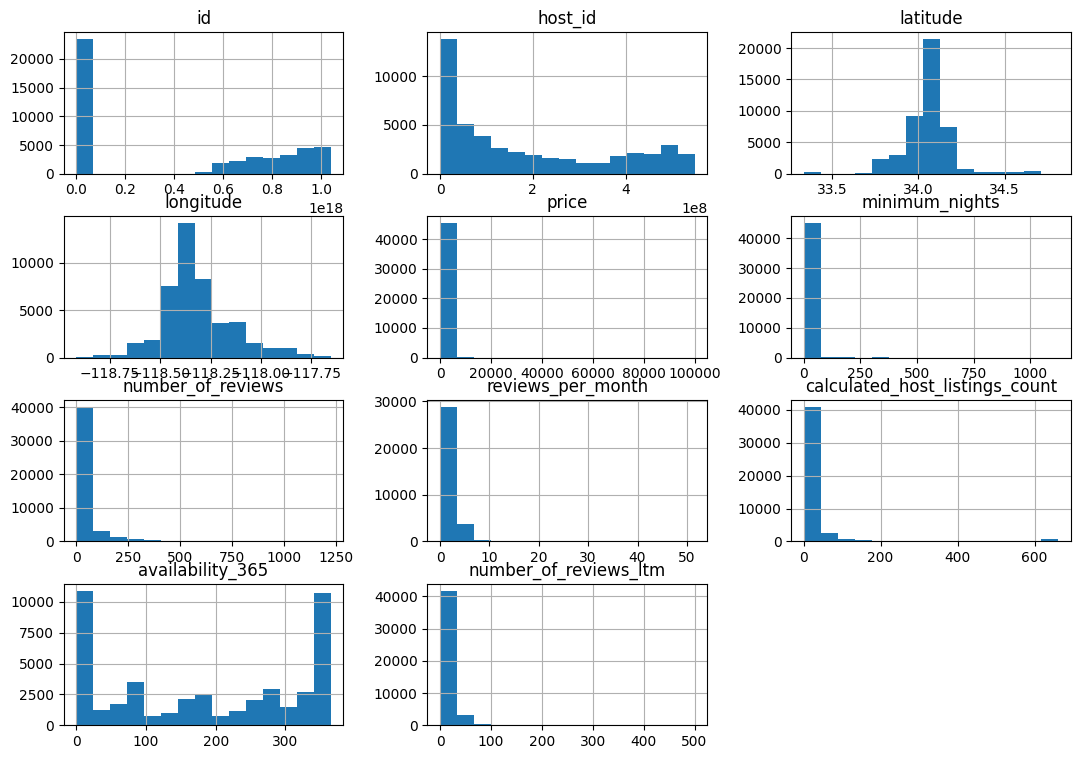

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(13,9));

Com uma rápida visualização no Histograma, podemos tirar algumas suposiçoes:

* Há *outliers* nas colunas `price` e `minimun_nights`, pois a coluna está mais deslocado para a esquerda, e há valores muito acima o que faz criar distorções.

Vamos verificar mais a fundo:

In [ ]:
# Ver resumo das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,45595.000000,45595.000000,45595.000000,32948.000000,45595.000000,45595.000000
mean,292.428117,17.647023,33.515144,1.439343,22.505297,185.083979
std,1034.911930,27.886409,73.784307,1.700374,82.546342,141.429563
min,5.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,90.000000,2.000000,0.000000,0.230000,1.000000,32.000000
50%,148.000000,7.000000,5.000000,0.760000,2.000000,179.000000
75%,249.000000,30.000000,31.000000,2.190000,10.000000,337.000000
max,99999.000000,1124.000000,1227.000000,51.550000,662.000000,365.000000


Como suspeitado pela análise do gráfico histograma, há fortes indícios de outliers nas colunas `price` e `minimun_nights`
* na coluna `price` 75% do preço diária está abaixo de $249,00, e o valor máximo é de 99.999,00, e também observamos um desvio padrão muito alto, o que corrobora com a hipótese do outlier.
* na coluna `minimun_nights` 75% das noites mínimas exigidas estão em 30 dias, mas o máximo é de 1124 dias, e o desvio padrão está alto também.

### **Q4. Analisando os Outliers**

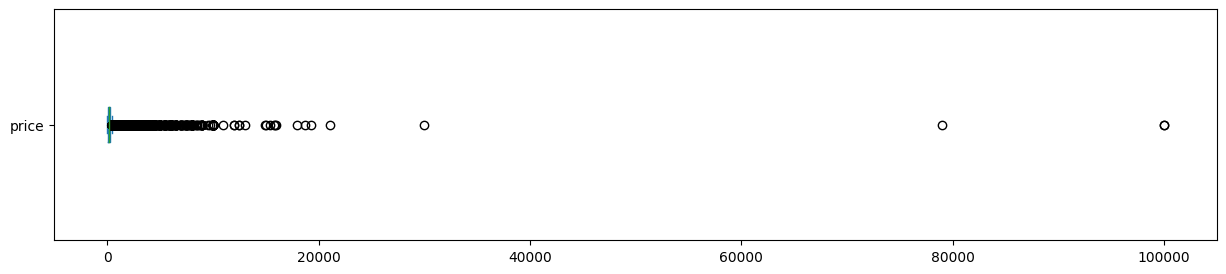


price: valores acima de 2800
429 entradas
0.9409%


In [ ]:
# price
df['price'].plot(kind='box', vert= False, figsize=(15,3));
plt.show()

# ver quantidade de valores acima de 2800 para price
print("\nprice: valores acima de 2800")
print("{} entradas".format(len(df[df.price > 2800])))
print("{:.4f}%".format((len(df[df.price > 2800]) / df.shape[0])*100))

Por Los Angeles ser uma cidade grande, com o custo de moradia mais alta, e com regiões muito famosas e caras, coloquei como corte o valor de US2.800,00, então valores acima disso representam menos de 1% dos dados, o que a principio acredito que pode ser cortado para a realização da análise.

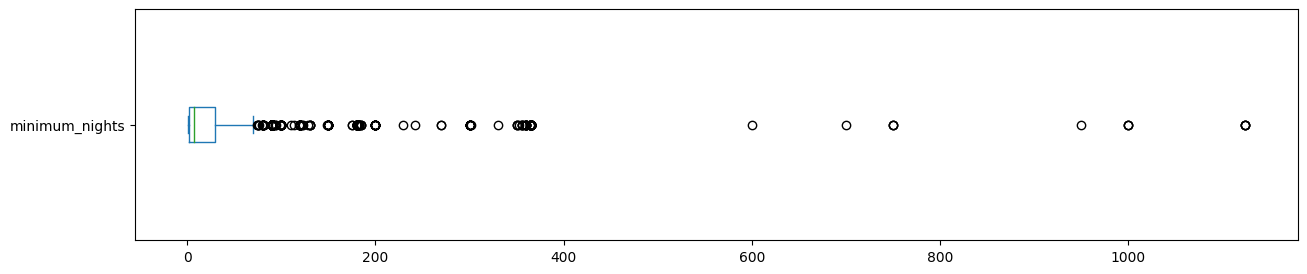

minimum_nights: valores acima de 30:
5483 entradas
12.0254%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

As políticas habitacionais das cidades podem ser restritivas quanto aos aluguéis de curto prazo, visando proteger as moradias dos residentes. Em Los Angeles, as regulamentações de aluguel de curto prazo se aplicam a aluguéis de menos de 30 dias.

Ao observar a configuração de "mínimo de noites" para os anúncios, podemos ver se o mercado tem se voltado para estadias de longo prazo. Foi para evitar regulamentações ou em resposta a mudanças na demanda por viagens?

Em alguns casos, o Airbnb transferiu um grande número de seus anúncios para estadias mais longas para evitar regulamentações de aluguel de curto prazo e responsabilidade.

Aqui coloquei como corte noites mínimas maiores que 30 dias.

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

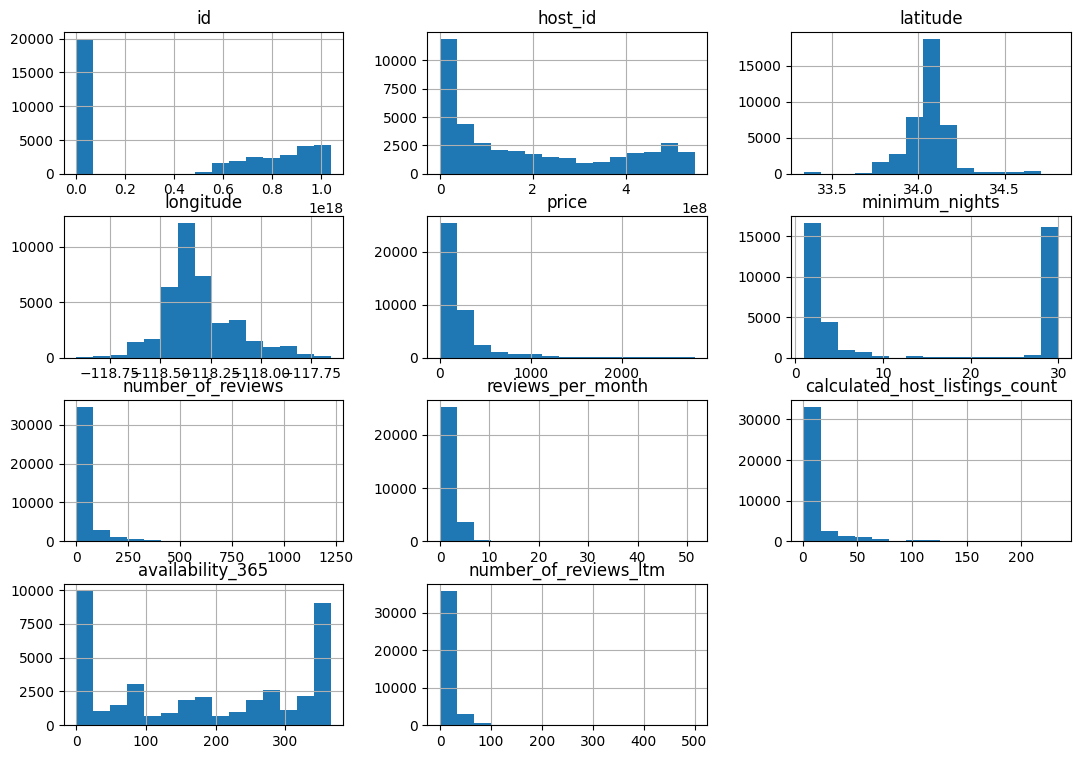

In [ ]:
# remover os *outliers* em um novo DataFrame
df1 = df.copy()
df1.drop(df1[df1['price'] > 2800].index, axis=0,inplace=True)
df1.drop(df1[df1['minimum_nights'] > 30].index, axis=0,inplace=True)

df1.hist(bins=15, figsize=(13,9));

Como observamos, melhoramos a distribuição dos gráficos, seguimos adiante com a análise

### **Q5. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price``
print(f'US$ {round(df1.price.mean(),2)}')

US$ 236.57


### **Q6. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
corr = df1[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.028009,-0.087094,-0.074211,0.188087,0.086914
minimum_nights,-0.028009,1.000000,-0.188265,-0.445294,-0.019742,0.036115
number_of_reviews,-0.087094,-0.188265,1.000000,0.572763,-0.116346,-0.074596
reviews_per_month,-0.074211,-0.445294,0.572763,1.000000,-0.072527,-0.079214
calculated_host_listings_count,0.188087,-0.019742,-0.116346,-0.072527,1.000000,0.113257
availability_365,0.086914,0.036115,-0.074596,-0.079214,0.113257,1.000000


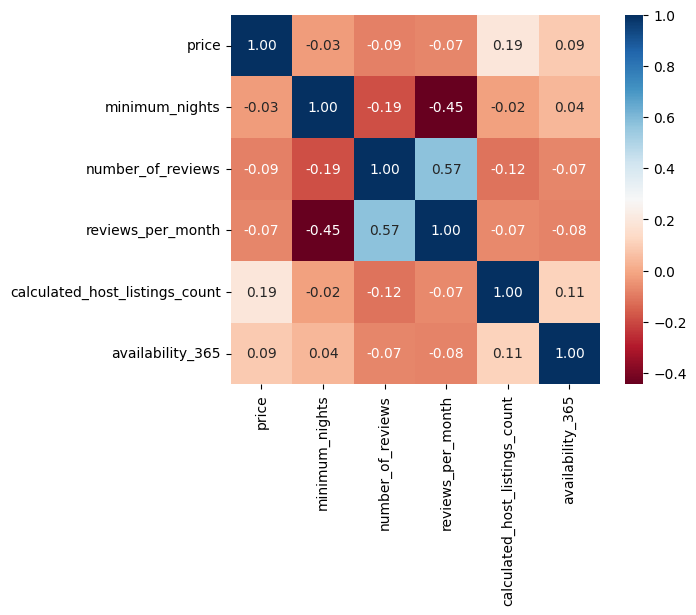

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df1.room_type.value_counts()

room_type
Entire home/apt    28958
Private room       10016
Shared room          693
Hotel room            60
Name: count, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
((df1.room_type.value_counts())/df1.shape[0]*100)

room_type
Entire home/apt    72.892491
Private room       25.212072
Shared room         1.744406
Hotel room          0.151031
Name: count, dtype: float64

Essa análise mostra que os tipos mais alugados de acomodação são os do tipo casa toda/apartamento e  Quarto privado, que juntos representam aproximadamente 98% das locações.

### **Q6. Qual a localidade mais cara do dataset?**

A localidade mais cara fica localizado em Bel-Air. Bel Air é um bairro nobre residencial da zona oeste de Los Angeles, Califórnia, no sopé das montanhas de Santa Monica, portanto acredito que a probabilidade disso se confoirmar verdadeiro e sem erro, é bem alta.

In [96]:
# ver preços por bairros, na média
df1[['neighbourhood','price']].groupby('neighbourhood').mean().sort_values('price', ascending=False).reset_index().head(5)

,neighbourhood,price
0,Bel-Air,947.640000
1,Beverly Crest,877.406667
2,Malibu,856.191257
3,Hollywood Hills West,793.606498
4,Rancho Palos Verdes,632.500000


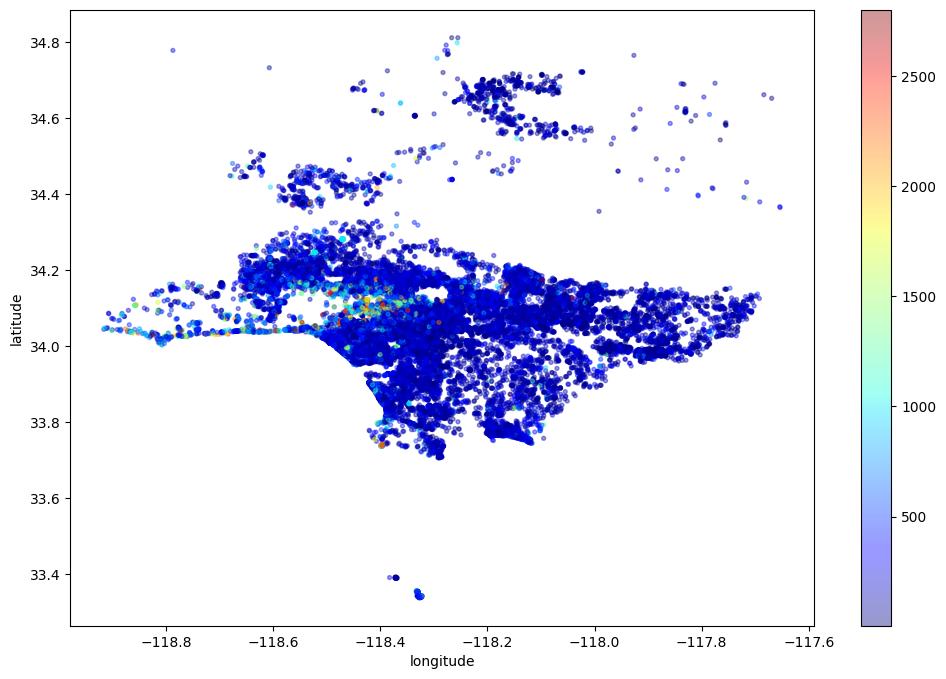

In [ ]:
# plotar os imóveis pela latitude-longitude
df1.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df1['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

In [87]:
# Criar um mapa
#mapa = folium.Map(location=[df1.latitude.mean(), df1.longitude.mean()], zoom_start=10)

# Adicionar marcadores para cada ponto com preço
#for index, row in df1.iterrows():
#    folium.Marker([row['latitude'], row['longitude']], popup=f'Preço: {row["price"]}').add_to(mapa)

# Salvar o mapa como um arquivo HTML
#display(mapa)

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

A média do número mínimo de noites está meio alto, mas acredito que isso se deve ao fato da legislação de L.A sobre aluguel de curto período, que está ficando mais rígido e com isso o Airbnb e os proprietários estão se adequando para se enquadrar na nova legislação.

In [90]:
# ver a média da coluna `minimum_nights``
round(df1.minimum_nights.mean())

14

## Conclusões

A análise inicial da base de dados do Airbnb revelou alguns insights valiosos, apesar de ser uma análise superficial. Observou-se a presença de outliers em algumas variáveis, sugerindo a necessidade de uma investigação mais aprofundada para compreender melhor esses casos excepcionais.

Um dos achados importantes foi a tendência de aumento das estadias mínimas exigidas. Este fenômeno pode ser atribuído à implementação de uma nova legislação na cidade, que impõe restrições aos aluguéis de curto prazo. Tanto os proprietários quanto o aplicativo estão se adaptando a essas novas regulamentações, o que se reflete nos requisitos de estadia mínima. Para uma compreensão mais completa das implicações dessa legislação, recomendamos consultar esse [link](https://abc7.com/vacation-short-term-rentals-airbnb-los-angeles-county/14423585/) para obter mais informações.

É fundamental ressaltar que o conjunto de dados analisado é uma versão resumida, contendo apenas uma parte dos atributos disponíveis. Sugerimos que, em análises exploratórias futuras, seja utilizado o conjunto de dados completo, a fim de obter uma visão mais abrangente e detalhada do cenário do Airbnb na cidade em questão. Essa abordagem mais completa pode fornecer insights mais robustos e subsidiar decisões mais informadas para os stakeholders envolvidos.